## Importing Libraries

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing
import zipfile # for Zipping and unzipping files
import os # Provides a module to interact with operating system
import matplotlib.pyplot as plt # for statistical data visualization
import seaborn as sns # for statistical data visualization
import plotly.express as px # for reating interactive and publication-quality visualizations.

## Data Preparation

In [5]:
# path to the zipped file
zipped_file_path = r'D:\Accounts\Social Media\MSBA Nexford\Programming in R & Python\Module 4 Assignment Netflix Data Visualization\netflix_data.zip'

# destination folder for the unzipped files
destination_folder = r'D:\Accounts\Social Media\MSBA Nexford\Programming in R & Python\Module 4 Assignment Netflix Data Visualization\Destination'

# Unzip the dataset
with zipfile.ZipFile(zipped_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# to get the list of files in the destination folder
files = os.listdir(destination_folder)

# If there's only one file after unzipping, you can rename it
if len(files) == 1:
    old_file_path = os.path.join(destination_folder, files[0])
    new_file_path = os.path.join(destination_folder, 'Netflix_shows_movies')

    # Rename the file
    os.rename(old_file_path, new_file_path)
    print(f"The dataset is unzipped and renamed to 'Netflix_shows_movies'.")
else:
    print("Error: There should be ONLY one file after unzipping.")

The dataset is unzipped and renamed to 'Netflix_shows_movies'.


## Data Cleaning

In [8]:
# Reading the netflix data:
file = pd.read_csv(r"D:\Accounts\Social Media\MSBA Nexford\Programming in R & Python\Module 4 Assignment Netflix Data Visualization\Destination\Netflix_shows_movies.csv")
file

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   
3                          NaN   
4             Fernando Lebrija   
...                        ...   
6229                       NaN   
6230                       NaN   
6231                       NaN   
6232                       NaN   
6233                       NaN   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                                NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6229                             United States                NaN   
6230                             United States                NaN   
6231                                       NaN                NaN   
6232                            United Kingdom                NaN   
6233                             United States                NaN   

      release_year    rating    duration  \
0             2019     TV-PG      90 min   
1             2016     TV-MA      94 min   
2             2013  TV-Y7-FV    1 Season   
3             2016     TV-Y7    1 Season   
4             2017     TV-14      99 min   
...            ...       ...         ...   
6229          2015        NR  13 Seasons   
6230          2016     TV-MA   4 Seasons   
6231          2016       NaN      60 min   
6232          2013     TV-MA   2 Seasons   
6233          2003     TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233             

In [9]:
# Removing mins and Seasons in the duration column to remain only with numerical values for movies and TV shows

file.duration =file.duration.apply(lambda x: x.replace("min", "") if "min" in x else x)
file.duration =file.duration.apply(lambda x: x.replace("Season", "") if "Season" in x else x)
file.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating duration                           listed_in  \
0     TV-PG      90   Children & Family Movies, Comedies   
1     TV-MA      94                      Stand-Up Comedy   
2  TV-Y7-FV       1                             Kids' TV   
3     TV-Y7       1                             Kids' TV   
4     TV-14      99                             Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [10]:
# Checking available columns.
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Checking for duplicates

file.duplicated().sum()

0

In [12]:
# checking the shape
file.shape

(6234, 12)

In [14]:
# infomation about the data types

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [15]:
# Checking for Null values in Ascending Order

file.isnull().sum().sort_values(ascending=False)

director        1969
cast             570
country          476
date_added        11
rating            10
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
 # Fill null values with the mode values in country column:
Mode_country = file['country'].mode()[0] 
file['country'] = file['country'].fillna(Mode_country)

# Removing rows with Null values in the column date_added :
file = file.dropna(subset=["date_added"])

#Using Impute functionality to fill blanks
columns_to_impute = ['director', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    file[column].fillna("Unknown", inplace=True)

# Checking for the Null Vaulues in the Dataset:
file.isnull().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_23484\2239972466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[column].fillna("Unknown", inplace=True)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Data Exploration:

In [17]:
# Making a copy of the file Analysis

file2 = file.copy()
file2.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                   Unknown   
2                   Unknown   
3                   Unknown   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating duration                           listed_in  \
0     TV-PG      90   Children & Family Movies, Comedies   
1     TV-MA      94                      Stand-Up Comedy   
2  TV-Y7-FV       1                             Kids' TV   
3     TV-Y7       1                             Kids' TV   
4     TV-14      99                             Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [20]:
# Analysis of type column
file2.type.value_counts()

type
Movie      4264
TV Show    1959
Name: count, dtype: int64

In [24]:
# Analysis of director column showing top 10 directors
file2.director.value_counts().head(10)

director
Unknown                   1958
Raúl Campos, Jan Suter      18
Marcus Raboy                14
Jay Karas                   13
Jay Chapman                 12
Steven Spielberg             9
Martin Scorsese              9
David Dhawan                 8
Lance Bangs                  8
Johnnie To                   8
Name: count, dtype: int64

In [25]:
# Analysis of country column showing top 10
file2.country.value_counts().head(10)

country
United States     2500
India              777
United Kingdom     347
Japan              175
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: count, dtype: int64

In [46]:
# Analysis of rating column 
file2.rating.value_counts()

rating
TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
Unknown        9
UR             7
NC-17          2
Name: count, dtype: int64

In [29]:
# Analysis of listed_in column showing top 10 listing
file2.listed_in	.value_counts().head(10)

listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            158
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: count, dtype: int64

In [30]:
# Excecuting analysis of movies only:
movies = file2.loc[(file2["type"]=="Movie")]
movies.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                          Unknown   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
4                             United States  September 8, 2017          2017   
6    Bulgaria, United States, Spain, Canada  September 8, 2017          2014   
7                                     Chile  September 8, 2017          2017   

  rating duration                                          listed_in  \
0  TV-PG      90                  Children & Family Movies, Comedies   
1  TV-MA      94                                     Stand-Up Comedy   
4  TV-14      99                                            Comedies   
6      R     110   International Movies, Sci-Fi & Fantasy, Thrillers   
7  TV-MA      60                                     Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
4  When nerdy high schooler Dani finally attracts...  
6  In a dystopian future, an insurance adjuster f...  
7  Fabrizio Copano takes audience participation t...

In [33]:
# Excecuting analysis of TV show only:
tv_show = file2.loc[(file2["type"]=="TV Show")]
tv_show.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime  Unknown   
3   80058654  TV Show  Transformers: Robots in Disguise  Unknown   
5   80163890  TV Show                           Apaches  Unknown   
8   80117902  TV Show                      Fire Chasers  Unknown   
26  80244601  TV Show                   Castle of Stars  Unknown   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                             Unknown  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...  United States   

           date_added  release_year    rating duration  \
2   September 8, 2018          2013  TV-Y7-FV       1    
3   September 8, 2018          2016     TV-Y7       1    
5   September 8, 2017          2016     TV-MA       1    
8   September 8, 2017          2017     TV-MA       1    
26  September 7, 2018          2015     TV-14       1    

                                            listed_in  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
2   With the help of three human allies, the Autob...  
3   When a prison ship crash unleashes hundreds of...  
5   A young journalist is forced into a life of cr...  
8   As California's 2016 fire season rages, brave ...  
26  As four couples with different lifestyles go t...

In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1959 entries, 2 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1959 non-null   int64 
 1   type          1959 non-null   object
 2   title         1959 non-null   object
 3   director      1959 non-null   object
 4   cast          1959 non-null   object
 5   country       1959 non-null   object
 6   date_added    1959 non-null   object
 7   release_year  1959 non-null   int64 
 8   rating        1959 non-null   object
 9   duration      1959 non-null   object
 10  listed_in     1959 non-null   object
 11  description   1959 non-null   object
dtypes: int64(2), object(10)
memory usage: 199.0+ KB


## Data Visualization:

In [47]:
# Analysis of Genre
file2["listed_in"].unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', 'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, 

Number of unique values in 'listed_in': 461


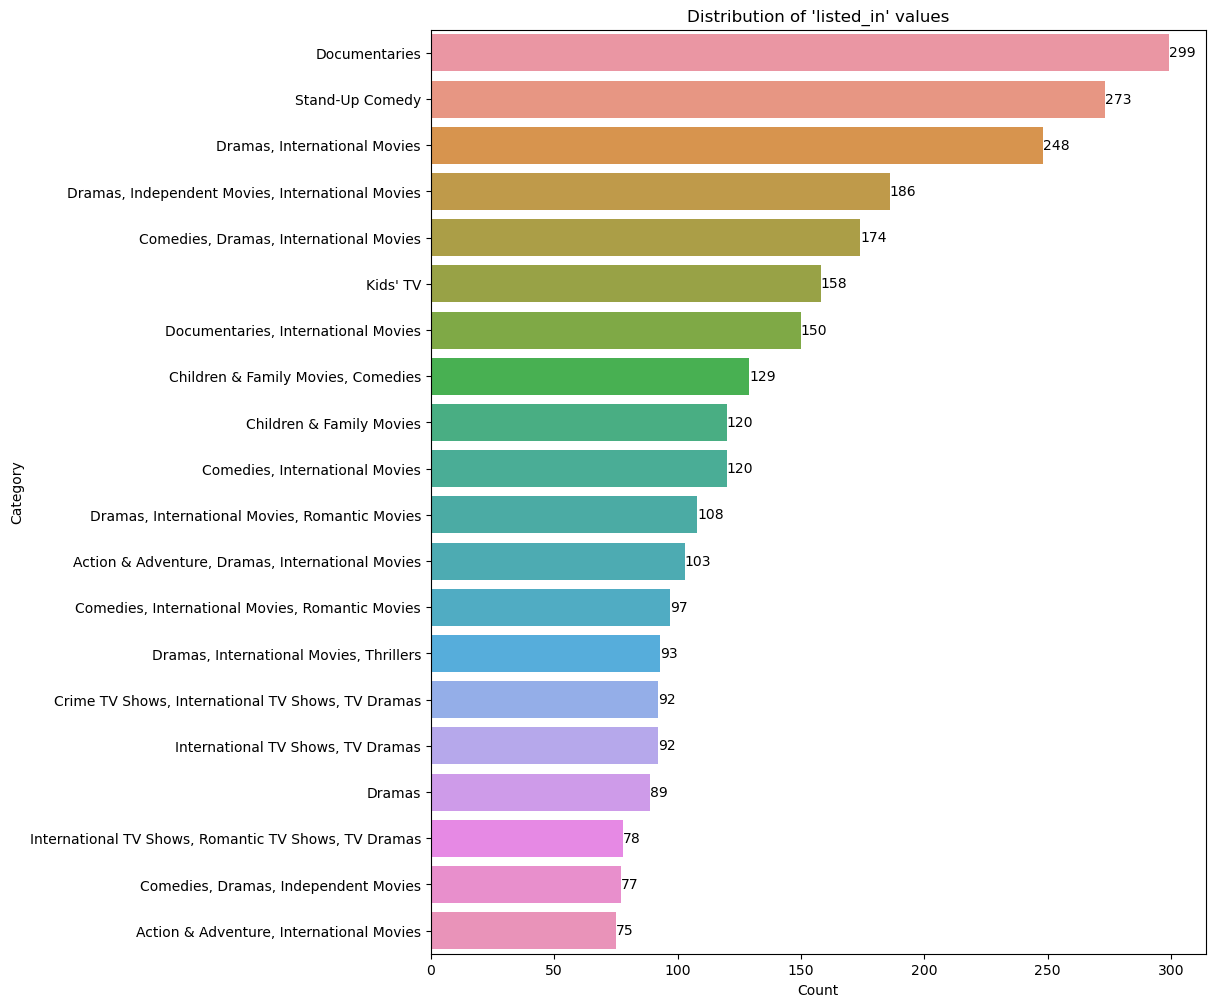

In [55]:
# Display the number of unique values in the listed_in column
print("Number of unique values in 'listed_in':", len(file2['listed_in'].unique()))

# Set a custom color palette
custom_palette = palette="YlGnBu"

# Creating a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 12))
sns.set_palette(custom_palette)
ax = sns.countplot(data=file2, y="listed_in", order=file2['listed_in'].value_counts().index[:20])
ax.bar_label(ax.containers[0])
plt.title("Distribution of 'listed_in' values")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

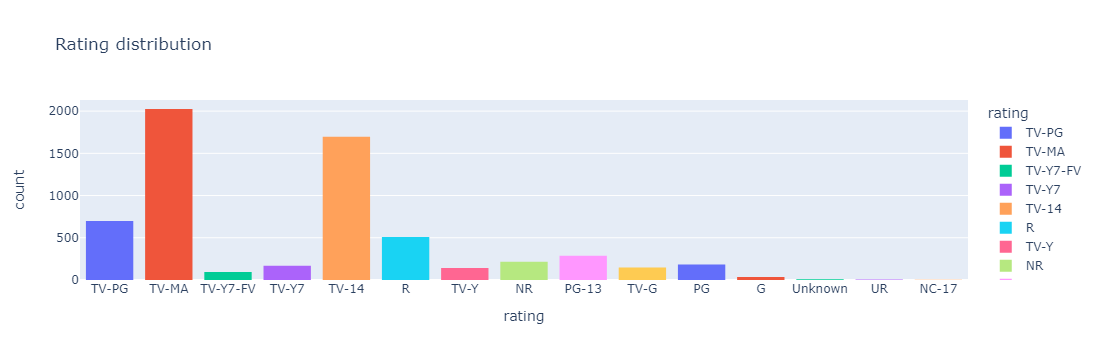

In [56]:
# plotting for Rating Distribution using Plotly Library.
fig = px.histogram(file,x="rating", title="Rating distribution", color="rating")
# Update the layout and add box plots
fig.update_layout(bargap=0.2)

fig.show()

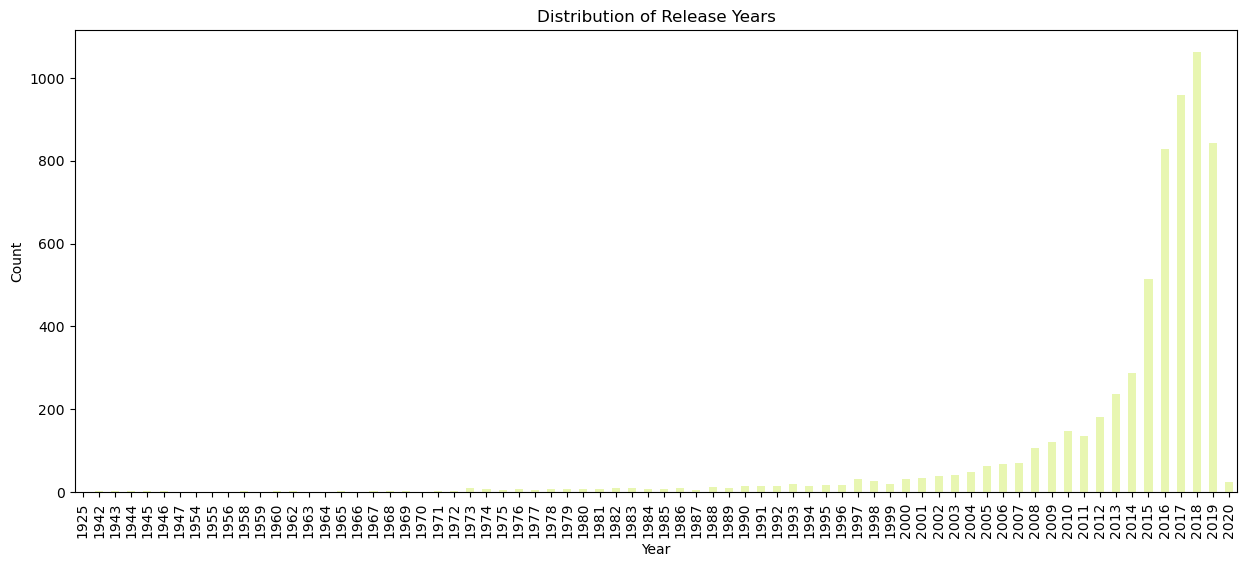

In [58]:
# Plotting distribution of 'release_year'
plt.figure(figsize=(15, 6))
file2['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

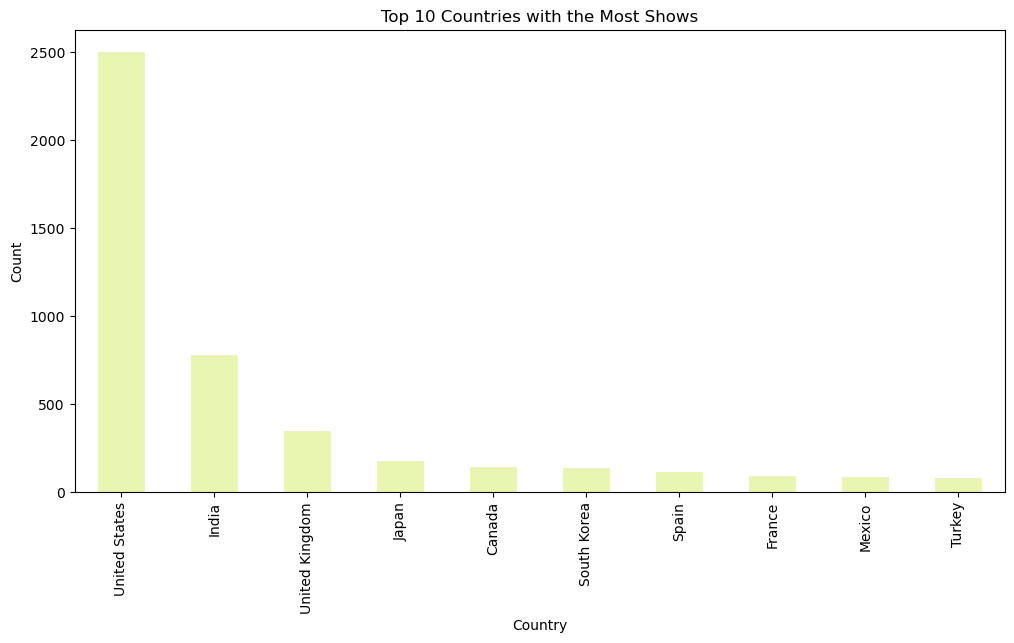

In [59]:
# Plotting a bar chart for the top 10 countries with the most shows
top_countries = file2['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with the Most Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()